<a href="https://colab.research.google.com/github/Radzio310/Sign-language-recognition/blob/main/SLR_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pobranie danych do folderu data

In [1]:

!pip install -U --no-cache-dir gdown --pre

!rm -rf data && mkdir data

!gdown 1p5_yO0fVzV58QeAGrzVtc5ML3ik27tyc -O data.zip

!unzip -q data.zip -d data

!ls data

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From (uriginal): https://drive.google.com/uc?id=1p5_yO0fVzV58QeAGrzVtc5ML3ik27tyc
From (redirected): https://drive.google.com/uc?id=1p5_yO0fVzV58QeAGrzVtc5ML3ik27tyc&confirm=t&uuid=e8bb1fc6-fe98-4914-8d24-610014af4eb3
To: /content/data.zip
100% 147M/147M [00:06<00:00, 21.5MB/s]
project  test  train


# Importowanie bibliotek

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Badanie zawartości bazy danych

In [6]:
image_count = len(list(glob.glob('data/**/**/*')))
image_count += len(list(glob.glob('data/**/**/**/*')))
print(f'{image_count} photos of letters in sign language')

10286 photos of letters in sign language


# Trenowanie modelu sieci neuronowej

In [14]:
batch_size = 32
class_count = 24

img_height = 64
img_width = 64

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'data/train',
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  'data/project/train',
  seed=123,
  validation_split=0.5,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4852 files belonging to 24 classes.
Using 3882 files for training.
Found 4852 files belonging to 24 classes.
Using 2426 files for validation.


## Ustawienia optymalizacyjne

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

## Tworzenie struktury modelu

In [28]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_count)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)       

# Proces trenowania

In [30]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
122/122 [==============================] - 33s 200ms/step - loss: 2.0911 - accuracy: 0.3838 - val_loss: 0.7286 - val_accuracy: 0.7918
Epoch 2/20
122/122 [==============================] - 22s 179ms/step - loss: 0.4950 - accuracy: 0.8421 - val_loss: 0.2613 - val_accuracy: 0.9176
Epoch 3/20
122/122 [==============================] - 18s 152ms/step - loss: 0.1646 - accuracy: 0.9526 - val_loss: 0.0666 - val_accuracy: 0.9856
Epoch 4/20
122/122 [==============================] - 21s 173ms/step - loss: 0.0582 - accuracy: 0.9871 - val_loss: 0.1319 - val_accuracy: 0.9571
Epoch 5/20
122/122 [==============================] - 19s 157ms/step - loss: 0.0613 - accuracy: 0.9822 - val_loss: 0.0591 - val_accuracy: 0.9827
Epoch 6/20
122/122 [==============================] - 21s 173ms/step - loss: 0.0346 - accuracy: 0.9902 - val_loss: 0.0316 - val_accuracy: 0.9872
Epoch 7/20
122/122 [==============================] - 21s 176ms/step - loss: 0.0089 - accuracy: 0.9990 - val_loss: 0.0084 - val_ac

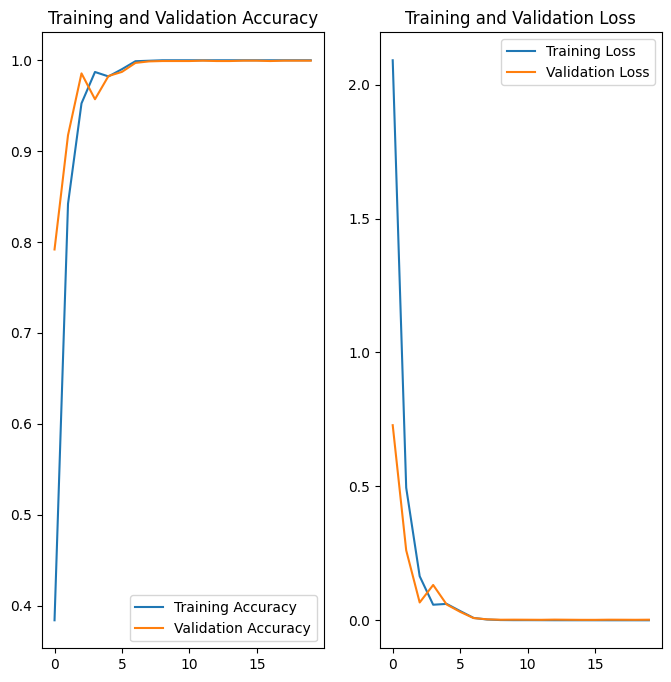

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Ocena modelu

In [32]:
from sklearn.metrics import classification_report

def evaluate_model(val_ds, model):
    y_pred = []
    y_true = []

    for batch_images, batch_labels in val_ds:
        predictions = model.predict(batch_images, verbose = 0)
        y_pred = y_pred + np.argmax(tf.nn.softmax(predictions), axis = 1).tolist()
        y_true = y_true + batch_labels.numpy().tolist()
    print(classification_report(y_true, y_pred))

evaluate_model(val_ds, model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       141
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00       114
           6       1.00      1.00      1.00       115
           7       1.00      1.00      1.00        60
           8       1.00      1.00      1.00        84
           9       1.00      1.00      1.00       129
          10       1.00      1.00      1.00        98
          11       1.00      0.99      1.00       114
          12       1.00      1.00      1.00       118
          13       1.00      1.00      1.00       100
          14       1.00      1.00      1.00       101
          15       1.00      1.00      1.00       106
          16       1.00      1.00      1.00        99
          17       0.99    